**Importing the Dependencies**

---




Here, libraries related to machine learning are imported.

**The imported libraries are:**

**numpy** - A fundamental library for scientific computing in Python. It provides high-performance operations on arrays and matrices.

**pandas** - A library used for data manipulation and analysis. It allows processing data in tabular (DataFrame) form.

**seaborn** - A Python library used for data visualization. It is based on Matplotlib and is used to create more attractive and informative graphs.

**matplotlib.pyplot** - A library used for creating plots in Python. It is used for graph plotting operations.

**sklearn.model_selection** - A library used for splitting data, cross-validation, and other tasks related to training and evaluating machine learning models.

**sklearn.metrics** - A sub-library containing metrics used to evaluate the performance of machine learning models.

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


**Importing the models**

---



**LogisticRegression:** It's used for binary classification problems and assumes that the data can be linearly separated.

**LGBMClassifier:** It's a fast and high-performance tree-based model. It uses gradient boosting and typically performs well with large datasets.

**DecisionTreeClassifier:** Decision trees classify data by making decisions based on the values of features in the dataset. It's a simple yet effective classification algorithm.

**RandomForestClassifier:** It works by combining many decision trees to produce more accurate and stable results. It often performs well on large datasets.

In [139]:
from sklearn.linear_model import LogisticRegression
from lightgbm.sklearn import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [140]:
# Loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv("/content/sample_data/creditcard.csv")

In [141]:
# Check first 5 rows of our dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [142]:
# Check last 5 rows of our dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19893,30631,-0.377215,0.973528,1.647077,0.732439,0.024728,-0.541379,0.828488,-0.060740,-0.725148,...,0.228443,0.685913,-0.107687,0.631740,0.126366,-0.327633,0.056522,0.033139,29.90,0.0
19894,30631,1.209281,0.078793,0.061820,0.593730,-0.235772,-0.448524,-0.141196,0.089236,0.411825,...,-0.302369,-0.984051,0.130401,-0.390756,0.105615,0.152881,-0.025292,0.021130,16.00,0.0
19895,30632,1.286596,-1.450336,0.814530,-1.308949,-2.055209,-0.592064,-1.317286,0.032386,-1.720017,...,0.040743,0.262534,-0.045112,0.515660,0.218606,-0.138794,0.026395,0.030885,92.00,0.0
19896,30633,-0.488090,1.018448,0.670593,-0.245462,0.828347,-0.233102,0.662586,-0.040028,-0.279439,...,-0.344859,-0.902035,-0.050171,-1.060827,0.062221,0.150428,0.130266,0.067290,1.99,0.0
19897,30633,-2.609841,2.479357,0.763844,0.044509,-0.645716,0.762867,-1.626415,-7.617854,1.399746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# show dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [144]:
# Checking of the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [145]:
# Details of legit and fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    19812
1.0       85
Name: count, dtype: int64

**0 means normal transactions while 1 means fraudulent transactions.**

**So we have highly unbalanced dataset , we should separate these data.**

In [146]:
# Seperating the data for analysis
normal = credit_card_data[credit_card_data['Class']==0]
fraud = credit_card_data[credit_card_data['Class']==1]

**We will do undersampling to balance our unbalanced dataset**

In [147]:
# Take a sample of normal transactions equal to the number of fraudulent transactions.
normal_sample=normal.sample(n=492)

In [148]:
# Concatenating of two DataFrames
final_dataset=pd.concat([normal_sample,fraud], axis=0) # axis=0 means concat data row by row

In [149]:
counts=final_dataset['Class'].value_counts()

In [150]:
counts # See the number of 0 and 1 results in our data

Class
0.0    492
1.0     85
Name: count, dtype: int64

**Splitting the data features and targets**

---



The first line is used to drop the column 'Class' from your dataset. The 'drop' function removes the specified column ('Class' column here). The parameter 'axis=1' indicates that this operation is column-wise. Thus, the variable 'X' will contain the entire dataset except the 'Class' column. It's often used to represent independent variables.

The second line sets the 'Class' column as the dependent variable. The values in this column represent the target variable or class you're trying to predict. The variable 'Y' will contain the values of this target variable.

In [151]:
X = final_dataset.drop(columns='Class',axis=1)
Y = final_dataset['Class']

In [152]:
print(X)

        Time         V1         V2         V3        V4         V5        V6  \
7653   10600   1.231712  -0.089101   0.655684  0.406777  -0.696112 -0.701142   
3304    2853  -1.915755   1.977897   1.191952  0.949368  -0.872613 -0.392553   
4917    4461  -1.653528   2.131573   1.977166  2.990607  -0.397349  1.735092   
13279  23407   1.240747   0.848160  -0.199825  1.553724   0.171273 -1.194116   
5593    5753  -1.128639   1.247640   1.122962  1.101082   0.210313 -0.370124   
...      ...        ...        ...        ...       ...        ...       ...   
17480  28755 -30.552380  16.713389 -31.103685  6.534984 -22.105532 -4.977692   
18466  29526   1.102804   2.829168  -3.932870  4.707691   2.937967 -1.800904   
18472  29531  -1.060676   2.608579  -2.971679  4.360089   3.738853 -2.728395   
18773  29753   0.269614   3.549755  -5.810353  5.809370   1.538808 -2.269219   
18809  29785   0.923764   0.344048  -2.880004  1.721680  -3.019565 -0.639736   

              V7         V8        V9  

In [153]:
print(Y)

7653     0.0
3304     0.0
4917     0.0
13279    0.0
5593     0.0
        ... 
17480    1.0
18466    1.0
18472    1.0
18773    1.0
18809    1.0
Name: Class, Length: 577, dtype: float64


**Exploratoty Data Analysis(EDA) & Visualization.**

---



**Making data ready for Plotting of Count values of Different Classes...**

In [154]:
class_count_df = pd.DataFrame(final_dataset['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))

**Bar Graph Representation**

Below code creates a bar chart showing the counts of 'Normal' and 'Fraud' classes. First, a figure named fig is created with dimensions set to 8x10. Then, a bar chart (ax) is created using the barplot() function of the seaborn library. Classes are placed on the x-axis and the count of each class on the y-axis.

The ax.bar_label() function shows the values on top of each bar. ax.containers[0] represents the container where the bars are.

The set_xticklabels() and set_yticklabels() functions configure the labels and display settings of the x and y axes.

Finally, the xlabel(), ylabel(), and title() functions set the labels and properties of the x-axis, y-axis, and the graph title, respectively.

<ipython-input-155-e22003b31caa>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
<ipython-input-155-e22003b31caa>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


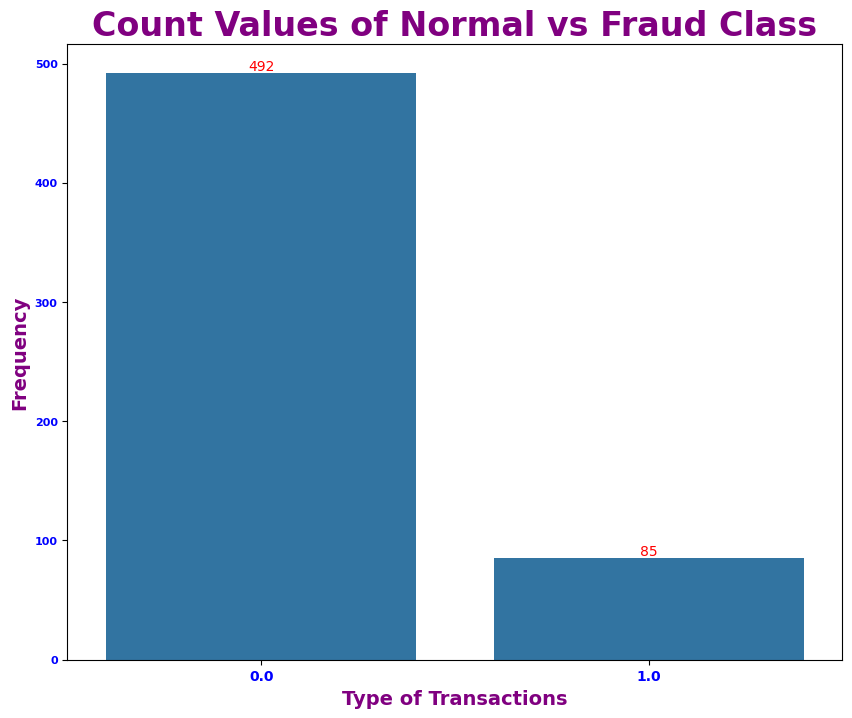

In [155]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red')

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

**Histogram Representation**

In this code, histograms are used to visualize the distribution of the "Amount" variable across fraud and normal transactions. Histograms display the frequency of values grouped into intervals, allowing for a clear view of the distribution of amounts for each class. Additionally, scaling the y-axis logarithmically enhances the visibility of differences between large intervals in the dataset.

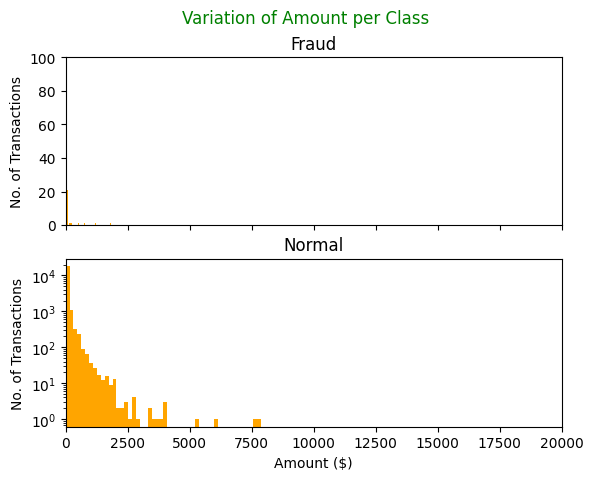

In [156]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='orange')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='orange')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

**Splitting the data into Training & Testing data**

In [157]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , stratify=Y , random_state=2 ) #stratify provide a balance between train and test set

In [158]:
# List of models
models = [ DecisionTreeClassifier(), LogisticRegression(max_iter=10000), LGBMClassifier(verbose=-1), RandomForestClassifier(),]

**Model Training and Comparing with other models**

---

Firstly, each model is trained here. For training, input data (X_train) and target labels (Y_train) are used. Then, the trained model makes predictions on a separate test dataset (X_test). These predictions are compared with the actual target labels (Y_test) to calculate the accuracy score of each model.

The results are printed to the screen in the form of accuracy scores, showing the performance of each model on the test dataset. This helps determine which model performs best for the given dataset.

In [159]:
def compare_models_train_test():

  for model in models:

    # Training the model
    model.fit(X_train,Y_train)

    # Evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test, test_data_prediction)

    print('Accuracy score of the ', model , ' = ', accuracy)

In [160]:
compare_models_train_test() # Comparing the accuracies of each model

Accuracy score of the  DecisionTreeClassifier()  =  0.9827586206896551
Accuracy score of the  LogisticRegression(max_iter=10000)  =  0.9741379310344828
Accuracy score of the  LGBMClassifier(verbose=-1)  =  0.9741379310344828
Accuracy score of the  RandomForestClassifier()  =  0.9913793103448276


 **Cross Validation**

---

Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance. Cross validation is an important step in the machine learning process and helps to ensure that the model selected for deployment is robust and generalizes well to new data.

In [161]:
# Creating a function to compare performance of the models
def compare_models_cross_validation():

  for model in models :

    cv_score = cross_val_score(model, X, Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy =  mean_accuracy*100

    mean_accuracy = round(mean_accuracy,2)

    print('Cross validation accuracies for the ', model, '= ',cv_score)

    print('Accuracy % of the ', model, mean_accuracy)

    print('--------------------------------------------')

In [162]:
compare_models_cross_validation()

Cross validation accuracies for the  DecisionTreeClassifier() =  [0.97413793 0.98275862 0.94782609 0.99130435 0.97391304]
Accuracy % of the  DecisionTreeClassifier() 97.4
--------------------------------------------
Cross validation accuracies for the  LogisticRegression(max_iter=10000) =  [0.99137931 0.96551724 0.96521739 0.99130435 0.97391304]
Accuracy % of the  LogisticRegression(max_iter=10000) 97.75
--------------------------------------------
Cross validation accuracies for the  LGBMClassifier(verbose=-1) =  [0.98275862 1.         0.97391304 0.99130435 0.99130435]
Accuracy % of the  LGBMClassifier(verbose=-1) 98.79
--------------------------------------------
Cross validation accuracies for the  RandomForestClassifier() =  [0.98275862 1.         0.95652174 0.9826087  0.99130435]
Accuracy % of the  RandomForestClassifier() 98.26
--------------------------------------------



We obtain the accuracy results obtained through cross-validation for four different classification algorithms (Decision Trees, Logistic Regression, LightGBM, and Random Forest). Based on the cross-validation accuracies of these algorithms, we see that the Random Forest classifier has the highest average accuracy rate. We will now proceed with our model based on this.



---
Here we define the parameters of the Random Forest classifier or regression model, allowing us to determine how the Random Forest model will be constructed and behave.

In [163]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2,5]

# Minumum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting samples for training each tree
bootstrap = [True, False]


In [164]:
# Create the param grid
param_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [165]:
rf_Model = RandomForestClassifier()  # We assign the best model we choose

**Hyperparameter Optimization**

---

Hyperparameter = Hyperparameters in machine learning are settings or configurations that are set before the learning process begins, governing the behavior of the algorithm.

There are hyperparameter tuning methods such as Grid Search, Random Search, and Bayesian Optimization. Among these, it has been found that Random Search is more effective, and our parameters were optimized using Random Search.

In [166]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv=5, verbose=2 , n_jobs=4 )

In [167]:
rf_RandomGrid.fit(X_train,Y_train) #This process searches through various combinations of hyperparameters of the random forest to find the
#model that will provide the best performance. As a result of this process, a model containing the best parameters in a set of hyperparameters is obtained.

best_model = rf_RandomGrid.best_estimator_

prediction = best_model.predict(X_test)  # Makes predictions on the X_test dataset, using the best model


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Below code evaluates and visualizes the performance of a classification model. It consists of two main parts:

**Classification Report:** It reports the model's performance in detail, providing metrics such as accuracy, precision, recall, and F1 score. It shows the performance for each class separately.

**Confusion Matrix:** It visualizes the confusion between classes by creating a heatmap. It displays the relationship between actual and predicted labels. Misclassified examples are shown with lower values in the heatmap.

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        99
         1.0       1.00      0.82      0.90        17

    accuracy                           0.97       116
   macro avg       0.99      0.91      0.94       116
weighted avg       0.97      0.97      0.97       116

------------------------------------------------------------

Confusion Matrix:



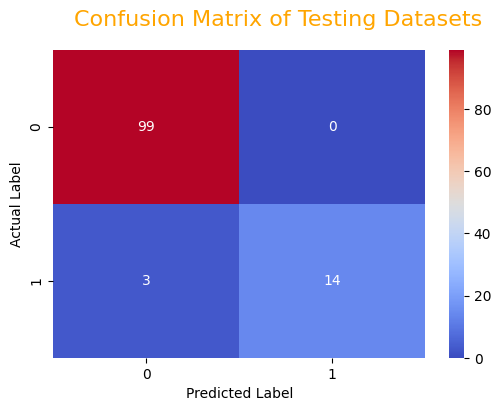

In [168]:
# Classification report
report = classification_report(Y_test, prediction)
print("Classification Report:")
print()
print(report)

print('------------------------------------------------------------')
print()

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, prediction)
print("Confusion Matrix:")
print()

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
ax.set(xlabel="Predicted Label",
ylabel="Actual Label");